In [1]:
import pandas as pd
from sensores import *
from tb import *

In [2]:
fluke = importa_fluke('../../data/fluke_26-07-2021_pruebas.csv')


<AxesSubplot:xlabel='tiempo'>

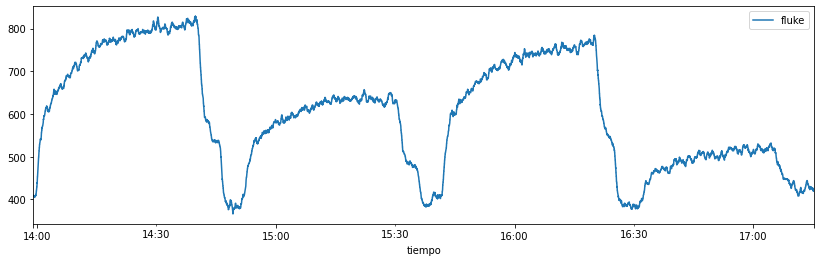

In [3]:
fluke.loc['2021-07-26'].plot(figsize=(14,4))

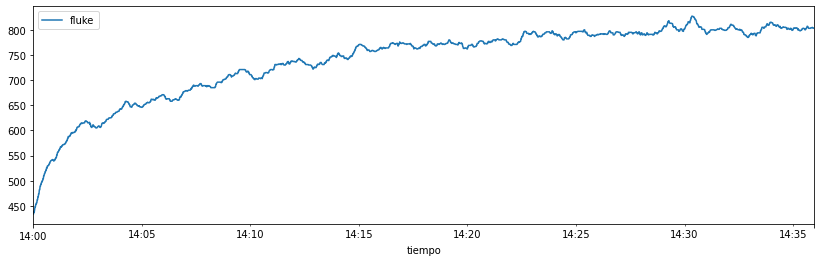

In [34]:
fecha1 = '2021-07-26 14:00'
fecha2 = '2021-07-26 14:35'
fluke[fecha1:fecha2].plot(figsize=(14,4))
f1 = fluke[fecha1:fecha2]

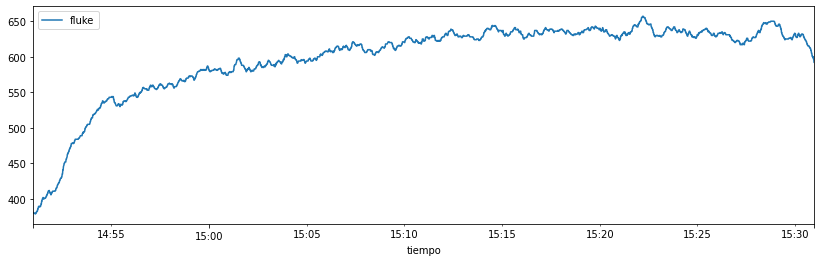

In [44]:
fecha1 = '2021-07-26 14:51:00'
fecha2 = '2021-07-26 15:30'
fluke.loc[fecha1:fecha2].plot(figsize=(14,4))
f2 = fluke.loc[fecha1:fecha2]

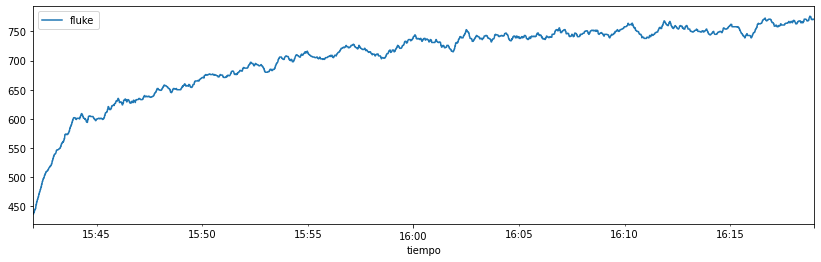

In [6]:
fluke.loc['2021-07-26 15:42':'2021-07-26 16:18'].plot(figsize=(14,4))
f3 = fluke.loc['2021-07-26 15:42':'2021-07-26 16:18']

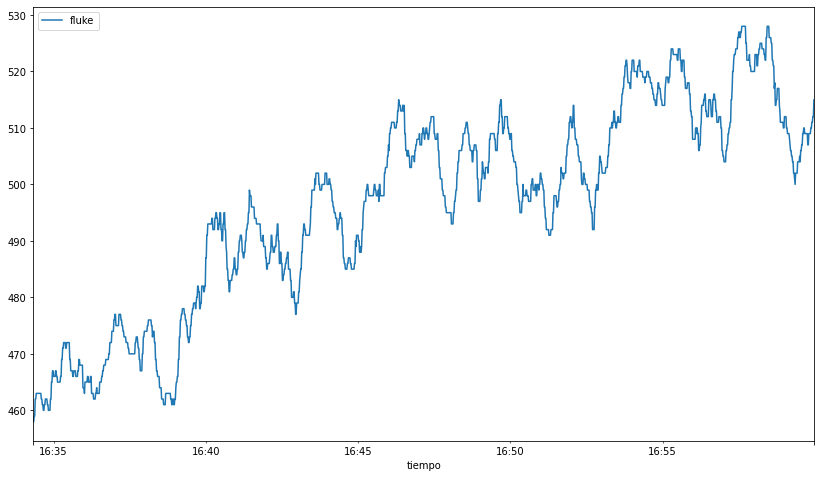

In [29]:
fluke.loc['2021-07-26 16:34:20':'2021-07-26 16:59'].plot(figsize=(14,8))
f4 = fluke.loc['2021-07-26 16:34:10':'2021-07-26 16:59']

In [10]:
f1.to_csv('../data/fluke_26-07-2021_800ppm.csv')

In [45]:
f2.to_csv('../data/fluke_26-07-2021_625ppm.csv')

In [12]:
f3.to_csv('../data/fluke_26-07-2021_750ppm.csv')

In [30]:
f4.to_csv('../data/fluke_26-07-2021_520ppm.csv')

In [14]:
tb = TB(config_file='config_gbv.ini',device_name='CO2')

["cdm4160","cjmcu811","dummy","eco2","etvoc","fatal","heartbeat","loadavg1","loadavg15","loadavg5","mh-z14a","notice","s8lp","scd30","sen0219","sen0219avg","sen0219cma","sen0220","t3022","uptime","uptime-linux"]


In [15]:
sensores = ["s8lp","sen0220","t3022","scd30",'cjmcu811']

datos = pd.concat([tb.get_df(key=sensor,start_datetime=('2021-07-24')) for sensor in sensores],axis=1)
datos.index = datos.index + pd.Timedelta("-5H")
datos.tail()


,s8lp,sen0220,t3022,scd30,cjmcu811
ts,,,,,
2021-07-27 11:24:38.479,437.0,NaN,NaN,NaN,NaN
2021-07-27 11:24:38.883,NaN,NaN,448.0,NaN,NaN
2021-07-27 11:24:39.213,NaN,NaN,NaN,389.0,NaN
2021-07-27 11:24:43.230,NaN,NaN,NaN,NaN,1779.0
2021-07-27 11:24:43.473,436.0,NaN,NaN,NaN,NaN


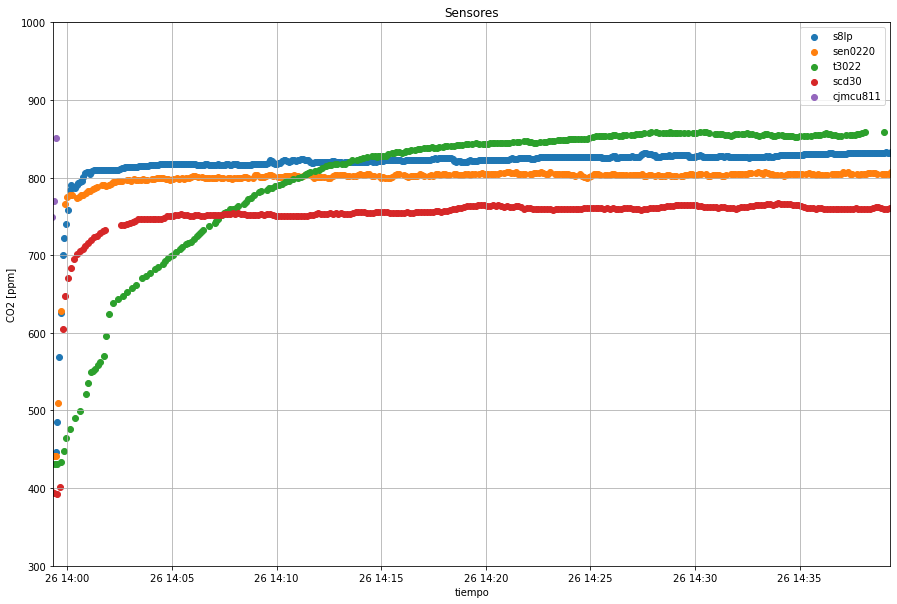

In [16]:
fig, ax = plt.subplots(figsize=(15,10))

fecha1 = parse("2021-07-26 13:59:20") 
fecha2 = fecha1 + pd.Timedelta("40Min")
ax.set_xlim(fecha1,fecha2)

ax.set_ylim(300,1000)
ax.set_ylabel("CO2 [ppm]")
ax.set_xlabel("tiempo")
ax.set_title("Sensores")
ax.grid()

for sensor in sensores:
    ax.scatter(datos[sensor].index,datos[sensor],label=sensor)

ax.legend()


In [17]:
datos= datos[fecha1:]
# datos.plot()

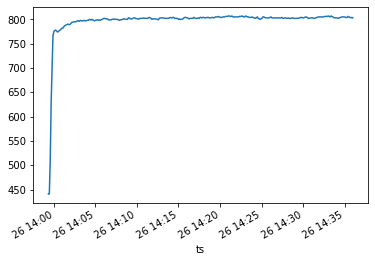

In [18]:
sensores800ppm = datos["2021-07-26 13:59:20":'2021-07-26 14:35']
sensores800ppm.sen0220.dropna().plot()
sensores800ppm.to_csv("../data/sensores_26-07-2021_800ppm.csv")

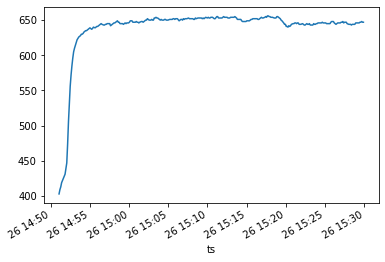

In [19]:
sensores625ppm = datos['2021-07-26 14:51':'2021-07-26 15:29']
sensores625ppm.sen0220.dropna().plot()
sensores625ppm.to_csv("../data/sensores_26-07-2021_625ppm.csv")

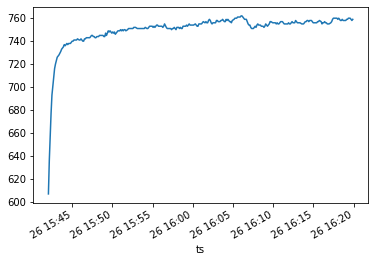

In [20]:
sensores750ppm = datos['2021-07-26 15:42':'2021-07-26 16:19']
sensores750ppm.sen0220.dropna().plot()
sensores750ppm.to_csv("../data/sensores_26-07-2021_750ppm.csv")

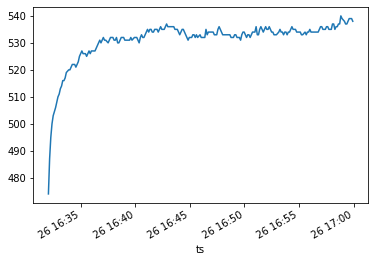

In [21]:
sensores520ppm = datos['2021-07-26 16:32':'2021-07-26 16:59']
sensores520ppm.sen0220.dropna().plot()
sensores520ppm.to_csv("../data/sensores_26-07-2021_520ppm.csv")